<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries
 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time

import numpy as np#Do aritmetic operations on arrays

import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os

import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [3]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [4]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.9063252121775113 test Score 0.8745605278006858
Estimators =  50 Train Score 0.9205725512208812 test Score 0.9125653355634538
Estimators =  100 Train Score 0.9238690848446947 test Score 0.9141199714153599
Estimators =  250 Train Score 0.9239789348046863 test Score 0.9188007232664732
Estimators =  450 Train Score 0.9237190618658074 test Score 0.9161507685828595


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

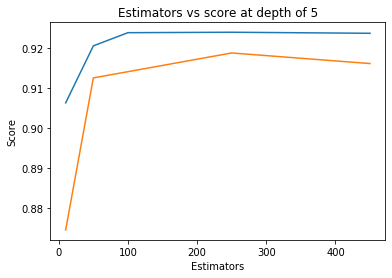

In [5]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8916120853581238 test Score 0.8687934859875491
depth =  9 Train Score 0.9572226298198419 test Score 0.9222953031452904
depth =  11 Train Score 0.9623451340902863 test Score 0.9252318758281279
depth =  15 Train Score 0.9634267621927706 test Score 0.9231288356496615
depth =  20 Train Score 0.9631629153051491 test Score 0.9235051024711141
depth =  35 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  50 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  70 Train Score 0.9634333127085721 test Score 0.9235601652753184
depth =  130 Train Score 0.9634333127085721 test Score 0.9235601652753184


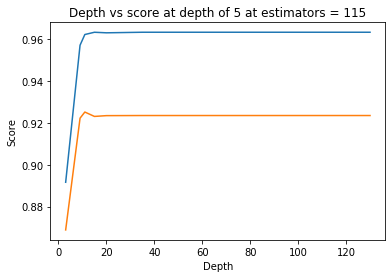

In [6]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [7]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25, return_train_score=True)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96225043 0.96215493 0.96057081 0.96194015 0.96330005]
mean train scores [0.96294922 0.96266735 0.96115674 0.96263457 0.96430539]


In [8]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=14, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=111,
                       min_weight_fraction_leaf=0.0, n_estimators=121,
                       n_jobs=-1, oob_score=False, random_state=25, verbose=0,
                       warm_start=False)


In [9]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [10]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [11]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9652533106548414
Test f1 score 0.9241678239279553


In [12]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


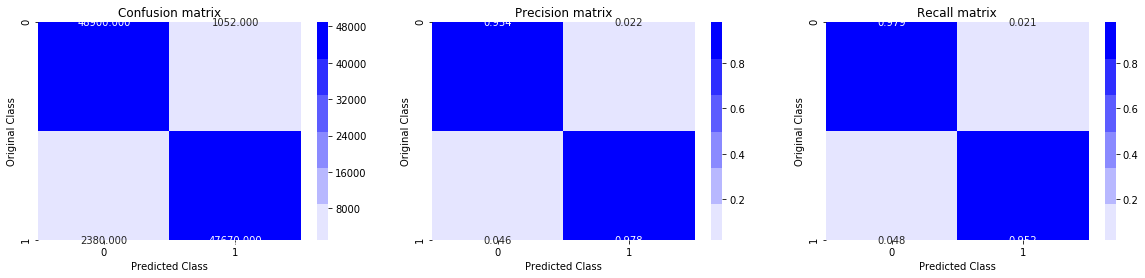

Test confusion_matrix


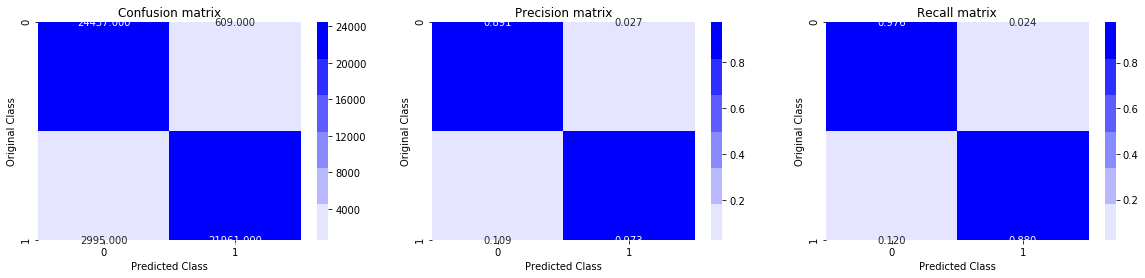

In [13]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

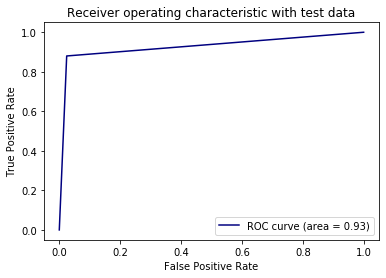

In [14]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

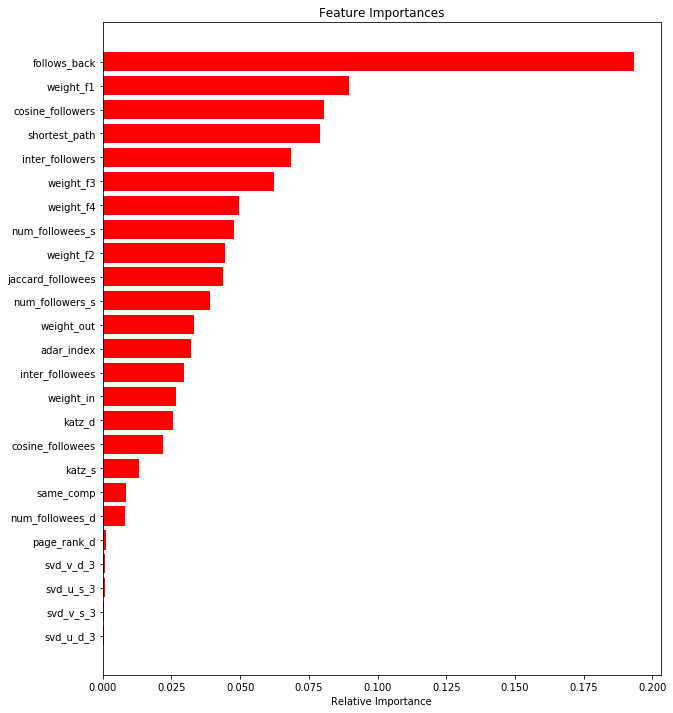

In [15]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [16]:
#jaccard_for_followees--> how many followee are common within (n,m)
#jaccard_for_followers--> how many followers are common within (n,m)

In [25]:
#Reading the datasets
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [26]:
print("Shape of Train set: ", df_final_train.shape)
print("Shape of Test : ", df_final_test.shape)

Shape of Train set:  (100002, 54)
Shape of Test :  (50002, 54)


In [29]:
# Creating a graph

if os.path.isfile('data/after_eda/train_pos_after_eda.csv'):
    train_graph=nx.read_edgelist('data/after_eda/train_pos_after_eda.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(train_graph))
else:
    print("please run the FB_EDA.ipynb or download the files from drive")

Name: 
Type: DiGraph
Number of nodes: 1780722
Number of edges: 7550015
Average in degree:   4.2399
Average out degree:   4.2399


**1) Creating feature Preferential Attachment**

In [30]:
def preferential_attachment_followers(a,b):
    try:
        if len(set(train_graph.predecessors(a))) == 0  | len(set(train_graph.predecessors(b))) == 0:
            return 0
        pref_att = len(set(train_graph.predecessors(a))) * len(set(train_graph.predecessors(b)))
    except:
        return 0
    return pref_att

In [31]:
def preferential_attachment_followees(a,b):
    try:
        if len(set(train_graph.successors(a))) == 0  | len(set(train_graph.successors(b))) == 0:
            return 0
        pref_att = len(set(train_graph.successors(a))) * len(set(train_graph.successors(b)))
    except:
        return 0
    return pref_att

**2) Creating feature svd_dot**

In [32]:
def svd_dot(dataframe,col_prefix):
    svd_dot_output = pd.Series()
    
    for i in range(1,7):
        col1 = col_prefix[0] + '_' + str(i)
        col2 = col_prefix[1] + '_' + str(i)
        svd_dot_output = svd_dot_output + (dataframe[col1] * dataframe[col2])
    
    return svd_dot_output

In [33]:
#mapping svd_dot_u and svd_dot_v to train and test data

df_final_train['svd_dot_u'] = svd_dot(df_final_train, ['svd_u_s', 'svd_u_d'])
df_final_train['svd_dot_v'] = svd_dot(df_final_train, ['svd_v_s', 'svd_v_d'])

df_final_test['svd_dot_u'] = svd_dot(df_final_test, ['svd_u_s', 'svd_u_d'])
df_final_test['svd_dot_v'] = svd_dot(df_final_test, ['svd_v_s', 'svd_v_d'])

In [34]:
#mapping preferential_followers to train and test data
df_final_train['preferential_followers'] = df_final_train.apply(lambda row: preferential_attachment_followers(row['source_node'],row['destination_node']),axis=1)
df_final_test['preferential_followers'] = df_final_test.apply(lambda row: preferential_attachment_followers(row['source_node'],row['destination_node']),axis=1)

#mapping preferential_followees to train and test data
df_final_train['preferential_followees'] = df_final_train.apply(lambda row: preferential_attachment_followees(row['source_node'],row['destination_node']),axis=1)
df_final_test['preferential_followees'] = df_final_test.apply(lambda row: preferential_attachment_followees(row['source_node'],row['destination_node']),axis=1)

In [35]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link

In [36]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

**3) Fitting XGBoost on final set of features**

Estimators =  10 Train Score 0.9302179379715004 test Score 0.9264801835364441
Estimators =  50 Train Score 0.9722781950296148 test Score 0.9322508161275279
Estimators =  100 Train Score 0.9763733317143753 test Score 0.9300285986653957
Estimators =  150 Train Score 0.9798893510479345 test Score 0.9288713576790941
Estimators =  175 Train Score 0.9813703438467668 test Score 0.928516884439165
Estimators =  200 Train Score 0.9828804046633012 test Score 0.927978603723122


Text(0.5, 1.0, 'Estimators vs score at depth of 5')

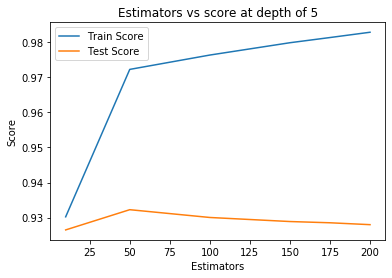

In [37]:
#Trying out different values of n_estimators hyperparameter and plotting f1 score for train and test set

estimators = [10, 50, 100, 150, 175, 200]
train_scores = []
test_scores = []
for i in estimators:

    clf = xgb.XGBClassifier(max_depth=5, n_estimators=i, n_jobs=-1,random_state=25)
    clf.fit(df_final_train,y_train)
    
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.legend()
plt.title('Estimators vs score at depth of 5')

**Observations**

*1) We can see that on an average we are getting train f1 score around 0.97 and test f1 score around 0.93 for reasonable number of n_estimators which is somewhere between 50-75. On further increasing n_estimators, XGBoost starts to overfit the train data.*

depth =  3 Train Score 0.9675354922332259 test Score 0.9231354642313546
depth =  4 Train Score 0.9683751141784228 test Score 0.9256562235393734
depth =  5 Train Score 0.9722781950296148 test Score 0.9322508161275279
depth =  7 Train Score 0.974666734249075 test Score 0.9314790118752778
depth =  9 Train Score 0.9788034084361827 test Score 0.9291408701552031
depth =  20 Train Score 0.9998901153788523 test Score 0.930050718512257
depth =  23 Train Score 0.9999200863067886 test Score 0.9325686332391514
depth =  25 Train Score 0.9999100979931875 test Score 0.9327174554964988


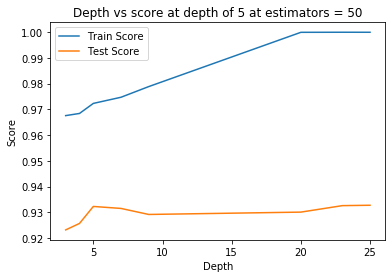

In [40]:
#Trying out different values of max_depth hyperparameter and plotting f1 score for train and test set

depths = [3, 4, 5, 7, 9, 20, 23, 25]
train_scores = []
test_scores = []
for i in depths:
    
    clf = xgb.XGBClassifier(max_depth=i, n_estimators=50, n_jobs=-1,random_state=25)
    clf.fit(df_final_train,y_train)
    
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.legend()
plt.title('Depth vs score at depth of 5 at estimators = 50')
plt.show()

**Observations**

*1) We can see that on an average we are getting train f1 score around 0.98 and test f1 score around 0.93 for reasonable number of max_depth which is somewhere between 5-10. On further increasing max_depth, XGBoost starts to overfit the train data.*

In [41]:
#Implementing RandomizedSearchCV for HyperParameter tuning of XGBoost Classifier taking n_estimators and max_depth as hyperparameter

from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(40,75),
              "max_depth": sp_randint(3, 10),
             }

clf = xgb.XGBClassifier(random_state=25,n_jobs=-1)

xgb_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=3,scoring='f1',random_state=25, return_train_score=True)

xgb_random.fit(df_final_train,y_train)
print('mean test scores',xgb_random.cv_results_['mean_test_score'])
print('mean train scores',xgb_random.cv_results_['mean_train_score'])

mean test scores [0.97515819 0.97563805 0.97397909 0.97364751 0.9720996 ]
mean train scores [0.97685039 0.97863561 0.97491871 0.9748273  0.97267928]


In [42]:
print(xgb_random.best_estimator_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=None, n_estimators=63,
              n_jobs=-1, nthread=None, objective='binary:logistic',
              random_state=25, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)


In [43]:
#Best XGBClassifier

clf = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
              max_depth=8, min_child_weight=1, missing=None, n_estimators=63,
              n_jobs=-1, nthread=None, objective='binary:logistic',
              random_state=25, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=True, subsample=1)

In [44]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [45]:
#f1 score from best fitted XGB model on train and test data set

from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9776061307640201
Test f1 score 0.931709070913436


In [46]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,5))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    p1 = sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels, annot_kws={"size": 16})
    p1.set_ylim(p1.get_ylim()[0] + 0.5, p1.get_ylim()[1] - 0.5)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    p2 = sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels, annot_kws={"size": 16})
    p2.set_ylim(p2.get_ylim()[0] + 0.5, p2.get_ylim()[1] - 0.5)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    p3 = sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels, annot_kws={"size": 16})
    p3.set_ylim(p3.get_ylim()[0] + 0.5, p3.get_ylim()[1] - 0.5)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


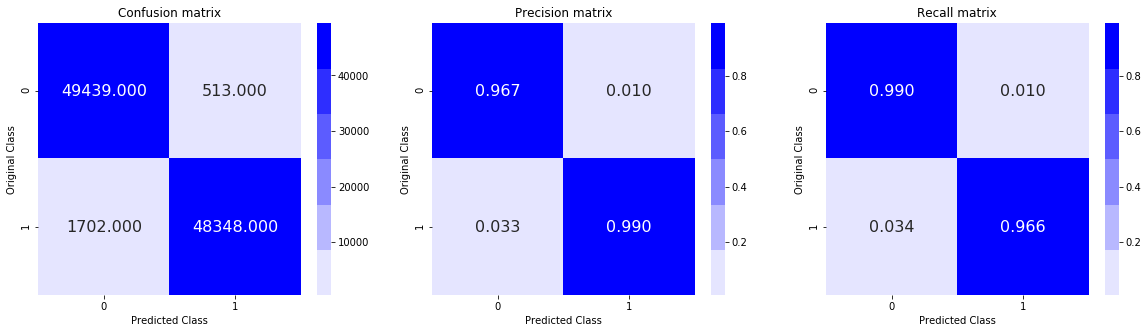

Test confusion_matrix


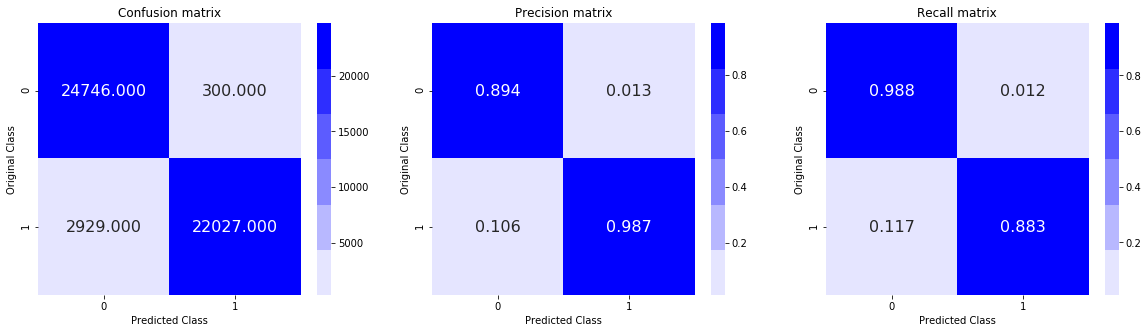

In [47]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

**Observations**
 
*1) On observing confusion matrix of both train and test we can conclude that our model is performing even better than Random Forest Classifier as we have very few False Positives and False Negatives.*

*2) On observing precision matrix of train set, we can say that model is working extremely well for both positive and negative classes. Also if we look at test precision matrix, model is performing outstaningly well for positive class and negative class.*

*2) On observing recall matrix of train set, we can say that model is working extremely well for both positive and negative classes. Also if we look at test recall matrix, model is performing outstaningly well for positive class and negative class.*

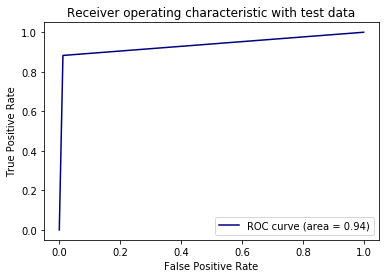

In [48]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

**Observations**

*1) Area under Receiver Operating Characteristic curve (ROC curve) is 0.94*

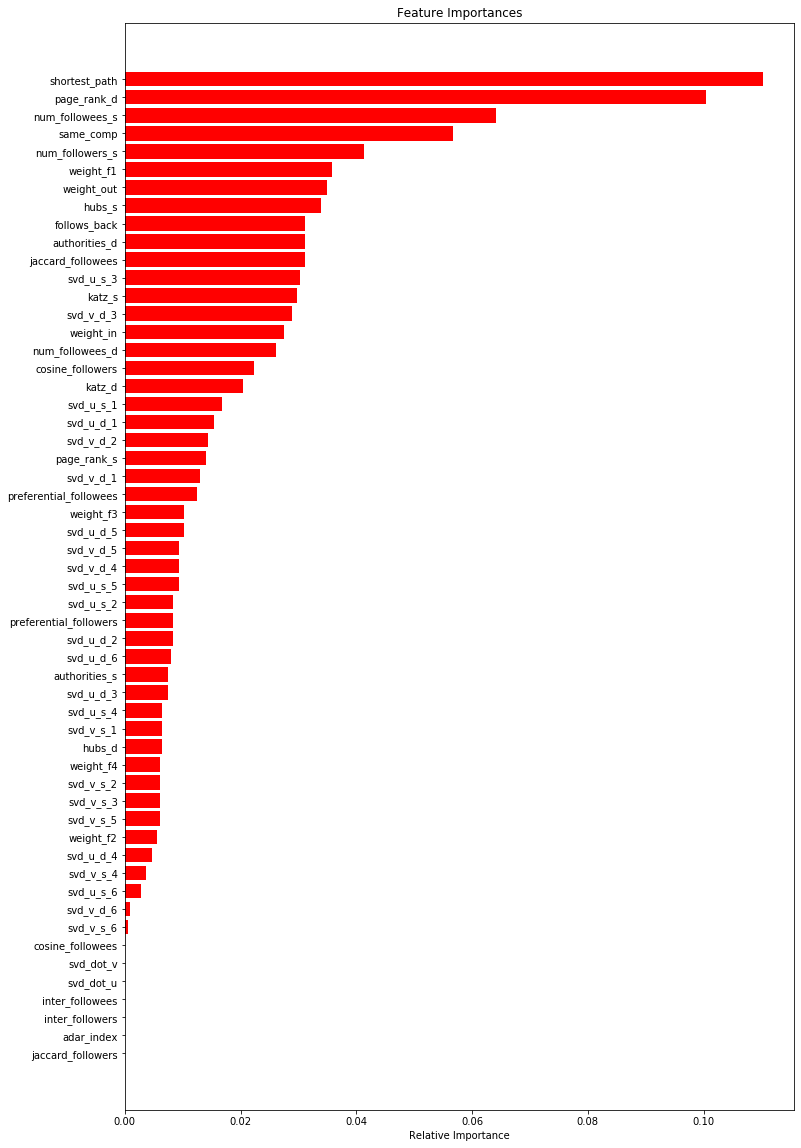

In [49]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[:]
plt.figure(figsize=(12,20))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations**

*1) From the feature importance graph we can see that the importance of features have changed for XGBoost Model in comparison to Random Forest Classifier.*
  
*2) Here, we are getting maximum feature importance for shortest path feature in comparison to follows_back feature that was getting maximum feature importance in Random Forest Classifier algo.*

*3) Also the preferential_followers and preferential_followees feature that we newly created are also contributing reasonable amount in XGBoost model.*

*4) But the other set of newly created features i.e. svd_dot_u and svd_dot_v do not have higher feature importance and thus we can conclude that they are contributing much.*

<h1>Conclusion/Observations</h1>

**Step 0: Understandig data and problem statement**

*a) As a first step to any Machine Learning problem, we need to thoroughly understand the problem statement and the given data.*

*b) In this case study we are solving the problem of Link Prediction in order to make recommendations to the users like in Facebook, instagram, etc.*

*c) We are given a directed graph with source and destination as the only source of data.*

**Step 1: Basic EDA**

*a) We performed some basic EDA steps like finding #follewrs for each person, #people each person is following, etc.*

*b) In order to pose this as a classification problem we need to generate negative class samples as well. Therefore apart from the links that were given to use we used remaining combinations to get data for negative class.*

*c) Before featurization, data is divided into Train and Test set.*

**Step 2: Feature Engineering**

*a) Before we start building features, we need to represent our data in the form of directed bi-partite graph where an edge exist between source and destination node in the direction source-->destination.*

*b) In order to represent the similarity between the source and destination node, various features are designed based on their neighbourhood, in-edges and out-edges.*

*c) A follower is someone who follows another user and followee is some famous person who is followed by a lot of people.
follower-->followee*

*d) Some similarity feautures that were created are: Jaccard Index and Cosine Distnace for both followers and followee.*

*e) Some ranking features were created on the basis of page rank algorithm to determine strength of a node and associate an importance score with each node. *

*f) Some other graph features that we used are shortest path, adar index, follow_back, HITS score, weight features, etc.
These features were designed with sole purpose of finding some sort of similarity between two nodes or maybe calculate some sort of likelihood of an edge existing between two nodes.*

**Step 3: Adding two new features: Preferential Attachment and SVD dot**

*a) Preferential Attachment is calculated at both followers and followee levels. It can be simply defined as the product of number of predecessors for source and destination node in case of followers whereas it's product of number of successor for source and destination node in case of followees.*

*b) SVD dot is computed both for left singular matrix and right singular matrix of the Adjacency Matrix on Matrix factorization and computing the dot product of values from top k dimension. (In our case k=6 i.e. we had 6 dimension vector.)*

*c) Both these features are calculated for both training and testing dataset.*

**Step 4: Modelling (XGBoost Classifier)**

*a) Since we are using XGBoost to train our model we need to tune the model carefully as XGBoost tend to overfit very quickly.*

*b) Now, we try out the n_estimator parameter keeping max_dept = 5 (constant), we can see from the graph plotted above that optimal n_estimator lie somewhere between 40-75 after which XGBoost tried to overfit on the train data and test set results become almost constant.*

*c) Now, we try out the max_depth parameter keeping n_estimators =50(constant), we can see from the graph plotted above that optimal max_depth lie somewhere between 3-10 after which XGBoost tried to overfit on the train data and test set results become almost constant.*

*d) Hence now on using RandomizedSearchCV to find the best combination of n_estimators and max_depth we iterate over only the above derived range of hyperparameters using 3-fold cross validation to arrive at out best estimator.*

*e) With this best XGBoost tuned model we predict output variable for both train and test and received Train f1 score around 0.977 and Test f1 score around 0.931 which is pretty reasonable.*

*f) On further plotting confusion matrix, precision matix and recall matrix we can see that model is performing extremely well for both positive and negative classes. Results obtained are even better than results by Random Forest Classifier in the previous case.*

*g) We also oberve the feature importance of all the features to determine their relative strength of each feature and how much one feature is contributing to thr result. In this contribution, one intresting fact being that except 2 new features, rest features in XGBoost have different order of importance than Random Forest. Hence, we can say that importance on fetures depends a lot on the model it is being fed to.*